# Principal Component Analysis

## Goal
PCA finds a new set of features such that all the dimensions are ortogonal (and hence linearly independent) and ranked according to the variance of the data along them.

Find a transformation such that
- The transformed features are linearly independent
- Dimensionality can be reduced by taking only the dimensions with the highest importance
- Those newly found dimensions should minimize the projection error
- The projected should have maximum spread, i.e maximum variance

## Variance
How much variation of spread the data one feature has.

$$Var(X) = \dfrac{1}{n}\sum(X_i - \bar{X})^2$$
<span style="color:red">Note : PCA is not same as linear regression</span>
<center>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*EzYLy4NW-KDWCzHVZh-SKQ.png">
    
    the linear regression tried to minimize MSE error instead the PCA tried to find axes that maximize the spread of the data
</center>


## Covariance Matris Matrix
indicated the level to which two variables vary together
$$Cov(X,Y) = \dfrac{1}{n-1}\sum (X_i-\bar{X})(Y_i-\bar{Y})^T$$


Eigenvector, Eigenvalues
The eigenvectors point in direction of the maximum variance, and the corresponding eigenvalues incated the importance of its corresponding eigen vector.
$$A\vec{v} = \lambda \vec{v}$$

## Approach
- Substract the mean from X
- Calculate $Cov(X,Y)$
- Calculate eigenvector and eigenvalues of covariance matrix
- sort the eigenvectors according to their eigenvalues in decreasing order.
- Choose first k eigenvectors and that will be the new k dimensions
- Transform the original n dimensional data points into k dimensions (= Projections with dot product)

In [12]:
import numpy as np

class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    def fit(self, X):
        # compute mean each features
        self.mean = np.mean(X,axis = 0)
        X = X - self.mean
        # covariance
        cov = np.cov(X.T)
        # eigenvectors, eigenvalues
        eig_val, eig_vec = np.linalg.eig(cov)
        # sort eigenvectors
        eig_vec = eig_vec.T
        idx = np.argsort(eig_val)[::-1]
        eig_val =eig_val[idx]
        eig_vec =eig_vec[idx]
        self.components = eig_vec.T
        # store first k eigenvectors

    def transform(self, X):
        # Project data
        X = X - self.mean
        return np.dot(X, self.components)

shape of X (150, 4)
shape of trasformed X: (150, 4)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20836\1228420404.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis',3))


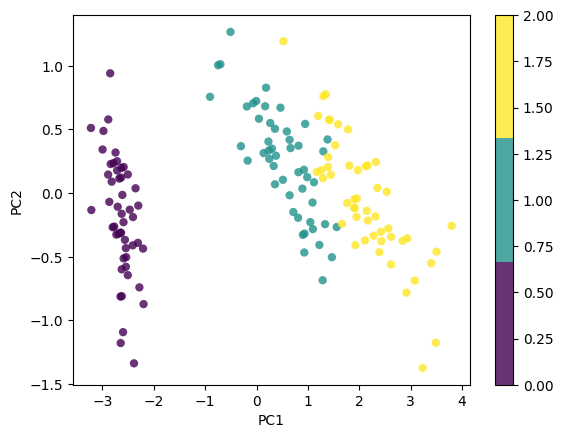

In [13]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
X = data.data
y = data.target

# project data to 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('shape of X', X.shape)
print('shape of trasformed X:', X_projected.shape)

x_1 = X_projected[:,0]
x_2 = X_projected[:,1]

plt.scatter(x_1,x_2, 
            c=y,edgecolor='none'
           ,alpha = 0.8,
           cmap = plt.cm.get_cmap('viridis',3))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

# Linear Discriminant Analysis
## Goal
Feature reduction. The goal is to project a datasets onto a lower-dimensional space with good class-separability
<center>
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*J0C4Ny5CVWCEbrNnwdYHJA.png">
</center>

## PCA VS LDA
- PCA: finding the component axes that maximize the variance of our data
- LDA Additionally interested in the axes that maximize the separation between multiple classes
- LDA is supervised learning, PCA is unsupervised

## Math
$S_W = \sum_{c\in C} S_C$

$S_c = \sum_{c \in C}(x_i - \bar{x_c}.(x_i-\bar{x_c})^T) = \sum_{c\in C} ||x_i - \bar{x_c}||^2$ 

## Eigenvalue, EigenVector problem

compute Eigenvalues and Eigenvectors for
$S_W^{-1}S_B$
## Approach
- Calculate S_B
- Calculate S_W
- Calculate Eigenvalues of $S_W^{-1}S_B$
- Sort the Eigen_vec according to their Eigenvalues in decreasing order
- Choose first k Eigenvectors and that will be the new k dimensions (Linear discriminants)
- Transform the original n dimensional datapoints into k dimensions (Projection with dot product)

In [34]:
import numpy as np

class LDA:
    def __init__(self, n_components):
        self.n_comp = n_components
        self.LD = None
    def fit(self,X,y):
        # dim(X) = n samples m features
        n_features = X.shape[1] # m
        class_labels = np.unique(y)

        # S_W, S_B
        mean_overall = np.mean(X, axis = 0) # [1,m] mean for every features 
        S_W = np.zeros((n_features, n_features)) # [m,m]
        S_B = np.zeros((n_features, n_features)) # [m,m]
        for c in class_labels:
            X_c = X[y==c] # [?,m]
            mean_c = np.mean(X_c, axis = 0) # [1,m]
            S_W += (X_c - mean_c).T.dot(X_c - mean_c) # [m,?] * [?,m]
            n_c = X_c.shape[0] # [1]
            mean_diff = (mean_c - mean_overall).reshape(n_features,1) # []
            S_B += n_c * (mean_diff).dot(mean_diff.T)
        A = np.linalg.inv(S_W).dot(S_B)
        eig_val, eig_vec = np.linalg.eig(A)
        idx = np.argsort(abs(eig_val))[::-1]
        eig_val = eig_val[idx]
        eig_vec = eig_vec[idx]
        self.LD = eig_vec[0:self.n_comp]

    def transform(self, X):
        # project data
        return np.dot(X,self.LD.T)

In [36]:
import numpy as np

class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None

    def fit(self, X, y):
        # Number of features
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Mean overall
        mean_overall = np.mean(X, axis=0)

        # Within-class scatter matrix, between-class scatter matrix
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c)
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * mean_diff.dot(mean_diff.T)

        # Solve the eigenvalue problem for the matrix inv(S_W) * S_B
        A = np.linalg.inv(S_W).dot(S_B)
        eig_vals, eig_vecs = np.linalg.eig(A)
        
        # Sort eigenvectors by eigenvalues in descending order
        idx = np.argsort(abs(eig_vals))[::-1]
        eig_vecs = eig_vecs[:, idx]
        
        # Select the first n_components eigenvectors
        self.components_ = eig_vecs[:, :self.n_components]

    def transform(self, X):
        # Project data
        return np.dot(X, self.components_)

# Example usage
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

# Initialize LDA with 2 components
lda = LDA(n_components=2)

# Fit the model
lda.fit(X, y)

# Transform the data
X_projected = lda.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)


Shape of X: (150, 4)
Shape of transformed X: (150, 2)


shape of X (150, 4)
shape of trasformed X: (150, 2)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20836\3042454609.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis',3))


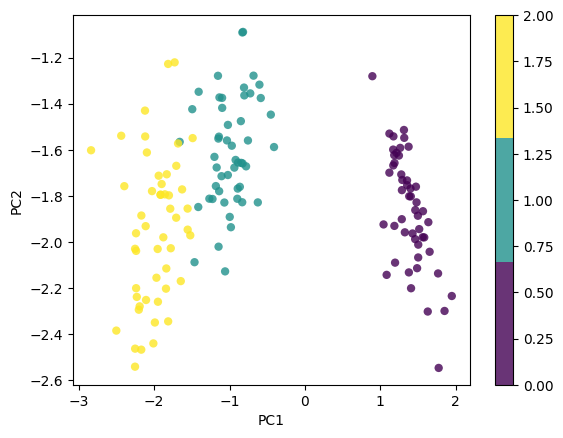

In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
X = data.data
y = data.target

# project data to 2 primary principal components
lda = LDA(2)
lda.fit(X,y)
X_projected = lda.transform(X)

print('shape of X', X.shape)
print('shape of trasformed X:', X_projected.shape)

x_1 = X_projected[:,0]
x_2 = X_projected[:,1]

plt.scatter(x_1,x_2, 
            c=y,edgecolor='none'
           ,alpha = 0.8,
           cmap = plt.cm.get_cmap('viridis',3))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()